# Statistical Modeling And Monte Carlo Estimation

## 1. Statistical Modeling

### 1.1. Objectives

Statistical modeling initiates & approximates **data generating process**

1. Quantify uncertainty

2. Inference

3. Measure support for hypothesis

4. **Prediction**

### 1.2. Process

1. Understand the problem

2. Plan and collect data

3. Explore data

4. Postulate model

    Choose a model that can appropriately approximate or summarize the data. **e.g.** regression or growth model. 

5. **Fit model** 

    Need to **estimate the parameters** of the model using the data. Going to take a **Bayesian approach** to this step. 

6. Check model

    Check if the model **adequately imitates the data generating process**. **e.g.** residual analysis and predictive checks.

7. Iterate : Step 4) ~ Step 6)

## 2. Bayesian Modeling

### 2.1. Components of Bayesian Models

### 2.2. Model Specification

$$
\begin{aligned}
\mathbf{y} \mid \mu, \sigma^2 &\overset{iid}{\sim} N(\mu, \sigma^2) \\[10pt]
p(\mu, \sigma^2) &= p(\mu) p(\sigma^2) \\[10pt]
\mu &\sim N(\mu_0, \sigma^2_0 )\\[10pt]
\sigma^2 &\sim IG(\nu_0, \beta_0) \\
\end{aligned}
$$

### 2.3. Posterior Derivation

$$
\begin{aligned}
\mathbf{y} \mid \mu, \sigma^2 &\overset{iid}{\sim} N(\mu, \sigma^2) \\[10pt]
\mu \mid \sigma^2 &\sim N(\mu_0, \frac{\sigma^2}{w_0} )\\[10pt]
\sigma^2 &\sim IG(\nu_0, \beta_0) \\[10pt]
p(y_1, \ldots, y_n, \mu, \sigma^2) &= p(y_1, \ldots, y_n \mid \mu, \sigma^2 ) p(\mu \mid \sigma^2 ) p(\sigma^2 )\\[10pt]
&= [\prod_i N(y_i \mid \mu, \sigma^2) ] \times N(\mu \mid \mu_0, \frac{\sigma^2}{w_0} ) IG(\sigma^2 \mid \nu_0, \beta_0) \\[10pt]
&\propto p(\mu, \sigma^2 \mid y_1, \ldots, y_n)
\end{aligned}
$$

### 2.4. Non-conjugate Models

If we do not use conjugate priors or if the models are more complicated, the posterior distribution **will not have a standard form**.

### Example 1

$$
\begin{aligned}
\mathbf{y} \mid \mu &\overset{iid}{\sim} N(\mu, 1) \\[10pt]
\mu &\sim t(\mu=0, \sigma=1, \nu=1) \\[10pt] 
p(\mu, \sigma^2 \mid y_1, \ldots, y_n) &\propto \prod_i [\frac{1}{2 \pi} exp(-\frac{1}{2} (y_i - \mu)^2 )] \times \frac{1} {\pi (1 + \mu^2)} \\[10pt]
&\propto exp(- \frac{1}{2}  \sum_i (y_i - \mu)^2 ) \times \frac{1} {(1 + \mu^2)} \\[10pt]
&\propto exp(- \frac{1}{2}  (\sum_i y_i^2 - 2 \sum_i y_i \mu + n \mu^2 ) \times \frac{1} {(1 + \mu^2)} \\[10pt]
&\propto \frac {exp[n (\bar{y} \mu - \frac{1}{2} \mu^2) ]}  {1 + \mu^2} \\[10pt]
\end{aligned}
$$

### Example 2

$$
\begin{aligned}
\mathbf{y} \mid \mu, \sigma^2 &\overset{iid}{\sim} N(\mu, \sigma^2) \\[10pt]
\mu \mid \sigma^2 &\sim N(\mu_0, \frac{\sigma^2}{w_0} )\\[10pt]
\sigma^2 &\sim IG(\nu_0, \beta_0) \\[10pt]
\end{aligned}
$$

## 3. Monte Carlo Estimation

### 3.1. Monte Carlo Integration

Monte Carlo estimatino refers to **simulating hypothetical draws** from a **probability distribution**.

Sometimes, analytic methods are not applicable.

If we have a **random sample** from a distribution, the average of the samples **converge in probability** to the true mean of distribution. ($\because$ Law of Large Numbers)

### Example 1

$$
\begin{aligned}
\theta &\sim Gamma(a, b) \\
&\text{where } a=2, b=\frac{1}{3} \\[10pt]
\mathbb{E}(\theta) &= \int_0^{\infty} \theta p(\theta) d\theta \\[10pt]
&= \int_0^{\infty} \theta \frac {b^a} {\Gamma(a)} \theta^{a-1} exp(-b \theta) d\theta \\
\end{aligned}
$$

In [51]:
# Method1

theta = rgamma(n=1e4, shape=2, rate=1/3)
mean(theta)

[1] 6.093903

[1] 6.0156

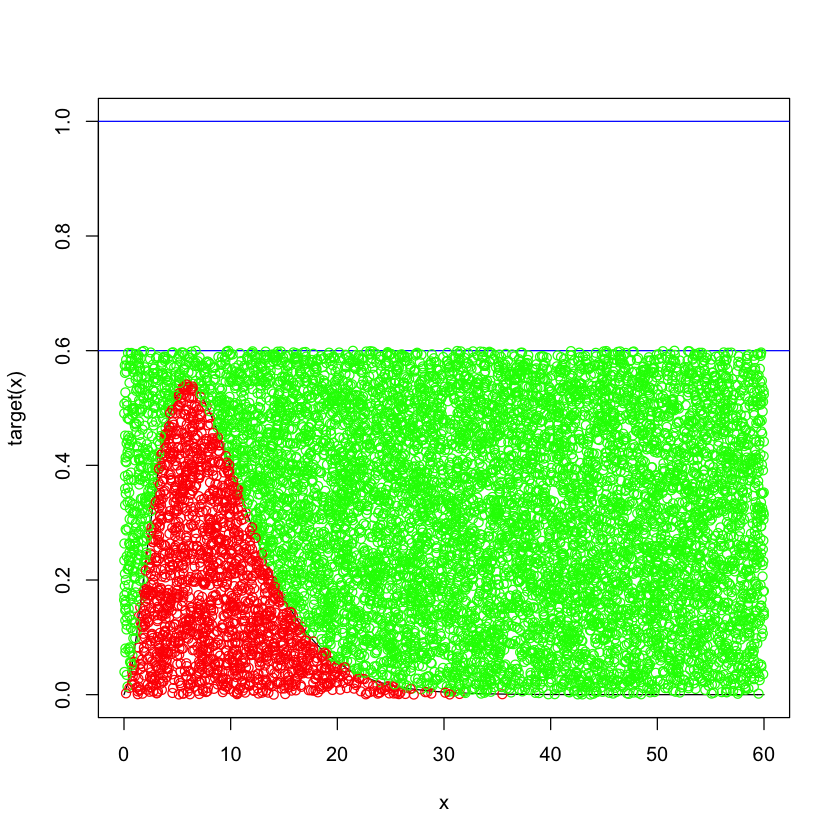

In [52]:
# Method2

target = function(theta)
{
  a = 2
  b = 1/3
  theta * (b^a / gamma(a)) * theta^(a-1) * exp(-b * theta)
}

plot(1, type="n", xlab="x", ylab="target(x)", xlim=c(0, 60), ylim=c(0, 1))
curve(target, xlim=c(0,60), add=T)
abline(h=c(.6, 1), col="blue")

x     = runif(1e4, 0, 60)
y     = runif(1e4, 0, 0.6)
accpt = ifelse(target(x) >= y, "red", "green")
points(x, y, col=accpt)

mean(accpt == "red") * (60*0.6)

### Example 2

$$
\begin{aligned}
\int h(\theta) p(\theta) d\theta &= \mathbb{E} [ h(\theta) ] \approx \frac{1}{m} \sum h(\theta_i^{*})\\[15pt]
\text{Example } \ \ h(\theta) &= I_{\theta < 5} (\theta) \\[10pt]
\mathbb{E} (h(\theta)) &= \int_0^{\infty} I_{\theta < 5} (\theta) p (\theta) d \theta \\[10pt]
&= \int_0^5 1 \cdot p(\theta) d \theta + \int_5^{\infty} 0 \cdot p(\theta) d\theta \\[10pt]
&= P[0 \le \theta \le 5] \\[10pt]
&\approx \frac{1}{m} \sum_i I_{\theta^{*} <5} (\theta ^{*} _i )
\end{aligned}
$$

### 3.2. Monte Carlo Error and Marginalization

Evaluation of **how good an approximation is by Monte Carlo sampling**.

### Example 1

**Goal** : distribution of $\theta^{*}$

$$
\begin{aligned}
\bar{\theta ^{*}} &\approx N(\mathbb{E}(\theta), \frac{Var(\theta)}{m}) \\[10pt]
\hat{ \text{Var}(\theta) } &= \frac{1}{m} \sum_i (\theta_i^{*} - \bar{\theta^{*}}) \\[10pt]
\sqrt { \frac{\hat{ \text{Var}(\theta) }} {m}   } &= \text{standard error} \\
\end{aligned}
$$

### Example 2

**Goal** : marginal distribution of y^{*}

$$
\begin{aligned}
y \mid \phi &\sim Bin(10, \phi) \\
\phi &\sim Beta(2,2) \\[10pt]
p(y, \phi) &= p(\phi) p(y \mid \phi) \\[10pt]
\end{aligned}
$$

## 4. Markov Chain

**Markov Assumption** : the probability of next observation depends **only on the previous observation**.

$$
\begin{aligned}
p(X_{t+1} \mid X_t, X_{t−1}, \ldots ,X_2,X_1) &= p(X_{t+1} \mid X_t) \\[15pt]
p(X_1, X_2, \ldots, X_n) &= p(X_1) \cdot p(X_2 \mid X_1) \cdot p(X_3 \mid X_2) \cdot p(X_4 \mid X_3) \cdot \ldots \cdot p(X_n \mid X_{n−1}) \\
\end{aligned}
$$

### 4.1. Discrete Case : Example(Chess Player)

**Initial distribution** : $\begin{bmatrix}
1 & 0 \end{bmatrix} = \ \ [\text{No play, Play}$]

**Transition matrix** : $\begin{bmatrix}
0 & 1 \\
0.3 & 0.7
\end{bmatrix}$

**Stationary distribution** : $\begin{bmatrix}
1 & 0 \end{bmatrix}
\begin{bmatrix}
0 & 1 \\
0.3 & 0.7
\end{bmatrix} ^n$

Using **eigenvectors**, we can calculate more quickly

Say we have **square matrix** A with **full rank**. Then A can be factorized via **Eigendecomposition**.

$$
\begin{aligned}
A = P D & P^{-1} \\[10pt]
\text{where } &P \text{ : matrix of eigenvectors as columns} \\
&D \text{ : matrix of eigenvalues as diagonal components} \\[15pt]
\therefore \ \ A^n = P D^n & P^{-1} \\
\end{aligned}
$$

In [46]:
InitDist = t(c(1, 0))
TransMat = matrix(c(0,.3,1,.7),nrow=2)
EIGEN    = eigen(TransMat)

In [47]:
InitDist %*% (EIGEN$vectors) %*% diag(EIGEN$values^3) %*% solve(EIGEN$vectors)

0.21,0.79


In [49]:
InitDist %*% (EIGEN$vectors) %*% diag(EIGEN$values^1e4) %*% solve(EIGEN$vectors)

0.2307692,0.7692308


### 4.2. Continuous Case : Example

Let the **transition distribution** as follows, with **mean equal to current state time $\phi$**.

$$
\begin{aligned}
p(X_{t+1} \mid X_t = x_t) &= N(\phi x_t, 1) \\[10pt]
\text{where } & −1 < \phi <1 \\
\end{aligned}
$$

**Theoretical Stationary Distribution** : $N(0, \frac{1} {1-\phi^2})$

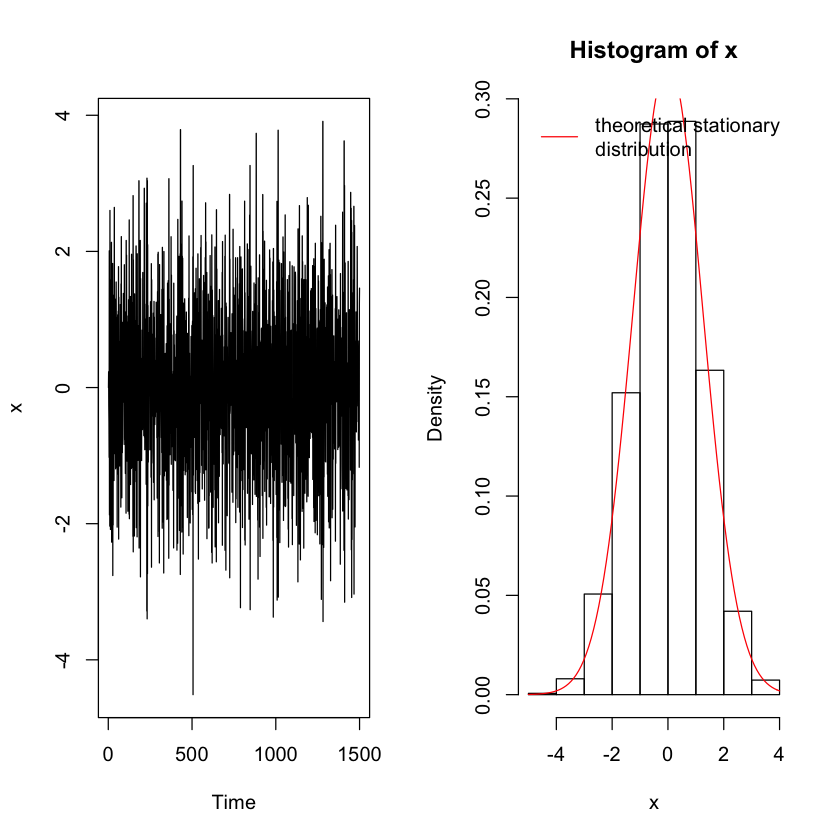

In [55]:
n = 1500
x = numeric(n)
phi = -0.6

for (i in 2:n) 
{
  x[i] = rnorm(1, mean=phi*x[i-1], sd=1.0)
}

par(mfrow=c(1,2))
plot.ts(x)

hist(x, freq=FALSE)
curve(dnorm(x, mean=0.0, sd=sqrt(1.0/(1.0-phi^2))), col="red", add=TRUE)
legend("topright", legend="theoretical stationary\ndistribution", col="red", lty=1, bty="n")